### Welcome
this is a mini project to classify hand written digits(hello world of Machine Learning) from the MNIST dataset

### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
from torchvision import datasets, transforms
from torch.nn import functional as F
from torch.utils.data import DataLoader

### Load Data

In [3]:
transform = transforms.ToTensor()

train_data = datasets.MNIST('data', train=True, transform=transform, download=True)
test_data = datasets.MNIST('data', train=False, transform=transform, download=True)

trainloader = DataLoader(train_data, batch_size=64, shuffle=True)
testloader = DataLoader(test_data, batch_size=64)

### Check some of the data

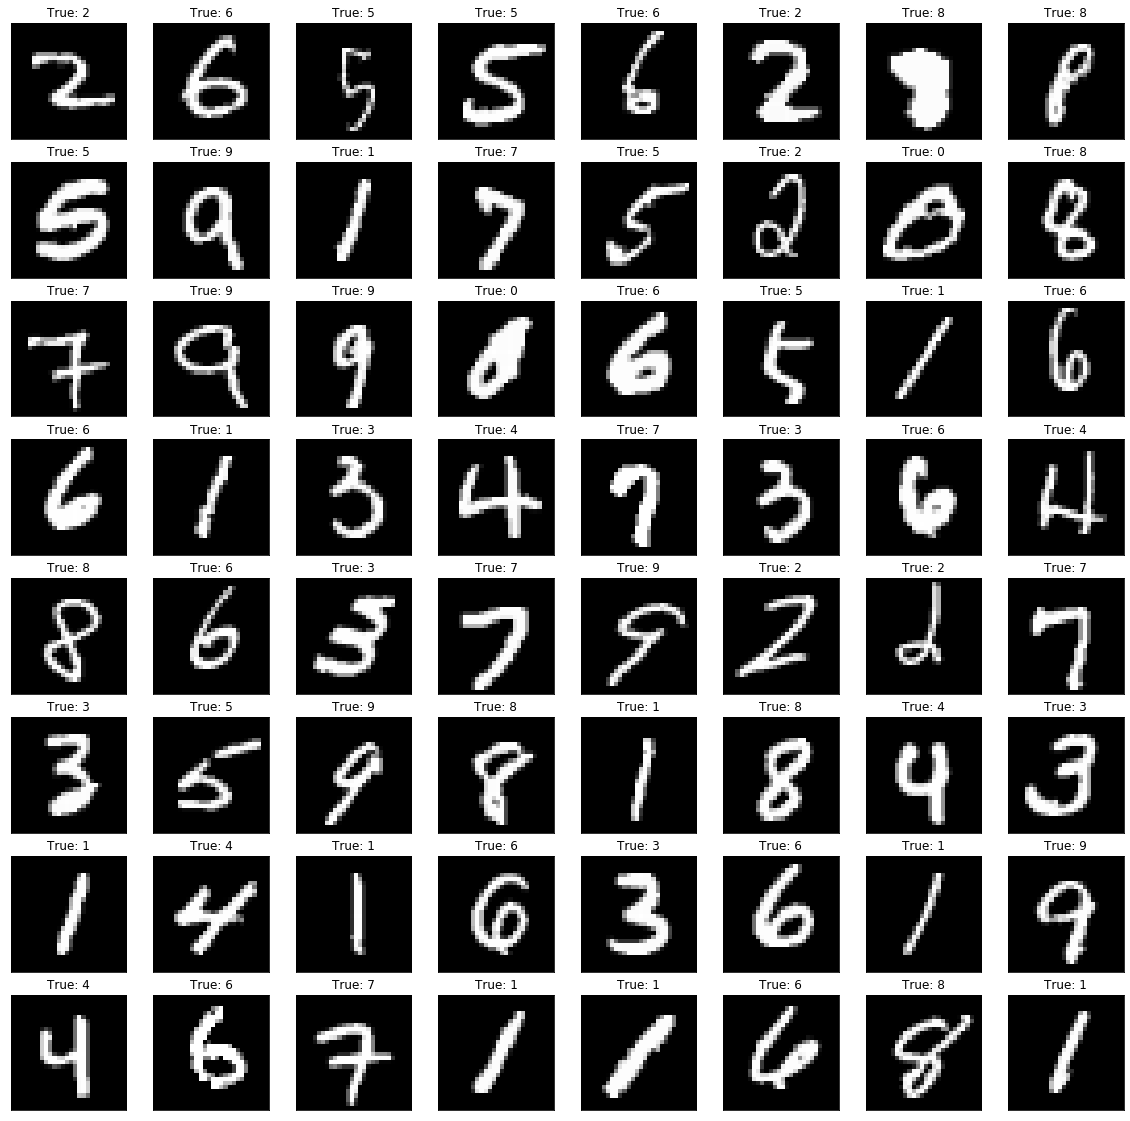

In [4]:
fig = plt.figure(figsize=(20, 20))
itr = iter(trainloader)
images, labels = itr.next()

for i, image in enumerate(images):
    img = fig.add_subplot(8, 8, i+1, xticks = [], yticks = [])
    img.imshow(torch.squeeze(image), cmap = 'gray')
    img.set_title("True: "+str(labels[i].item()))
    

### Create a NN

In [5]:
class Classifier(nn.Module):
    
    def __init__(self):
        super().__init__()
        
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        
        self.dropout = nn.Dropout(p=0.3)
        
    def forward(self, x):
        ## flatten x
        x = x.view(-1, 28*28)
        
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        
        x = self.fc3(x)
        
        return x
        
        
        
        
        
model = Classifier()       

In [6]:
device = 'cuda'
model.to(device)
optimizer = optim.Adam(model.parameters())
loss_function = nn.CrossEntropyLoss()
epoch = 20

### Train

In [7]:
for e in range(epoch):
    train_loss = 0
    model.train()
    for images, labels in trainloader:
        ### change the device of the tensor
        images, labels = images.to(device), labels.to(device)
        ### remove the grad from previous iterations
        optimizer.zero_grad()
        ### get the output label of the model
        outputs = model(images)
        ### get the loss
        loss = loss_function(outputs, labels)
        train_loss += loss * images.shape[0]
        ### perform backward and gradient step
        loss.backward()
        optimizer.step()
    else:
        print(f"epoch: {1+e}... train loss: {train_loss/len(trainloader):.3f}")
        

epoch: 1... train loss: 18.165
epoch: 2... train loss: 7.758
epoch: 3... train loss: 5.766
epoch: 4... train loss: 4.755
epoch: 5... train loss: 4.058
epoch: 6... train loss: 3.533
epoch: 7... train loss: 3.192
epoch: 8... train loss: 2.863
epoch: 9... train loss: 2.671
epoch: 10... train loss: 2.413
epoch: 11... train loss: 2.504
epoch: 12... train loss: 2.285
epoch: 13... train loss: 1.989
epoch: 14... train loss: 1.944
epoch: 15... train loss: 1.933
epoch: 16... train loss: 1.835
epoch: 17... train loss: 1.682
epoch: 18... train loss: 1.652
epoch: 19... train loss: 1.710
epoch: 20... train loss: 1.629


### Test

In [12]:
with torch.no_grad():
    model.eval()
    total_accuracy = 0
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        
        predictions = model(images)

        _, top_class = torch.topk(predictions, 1, dim = 1)
        correct = labels.view(*top_class.shape) == top_class
        accuracy = torch.mean(correct.type(torch.FloatTensor))
        total_accuracy += accuracy.item()
    print(f'Test Accuracy: {(total_accuracy / len(testloader)) * 100:.3f}%')

Test Accuracy: 98.328%


In [13]:
with torch.no_grad():
    model.eval()
    total_accuracy = 0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)
        
        predictions = model(images)

        _, top_class = torch.topk(predictions, 1, dim = 1)
        correct = labels.view(*top_class.shape) == top_class
        accuracy = torch.mean(correct.type(torch.FloatTensor))
        total_accuracy += accuracy.item()
    print(f'Train Accuracy: {(total_accuracy / len(trainloader)) * 100:.3f}%')

Train Accuracy: 99.755%


### Results
we achived 98.328% test accuracy and 99.755% train accuracy

let's try to look at some images

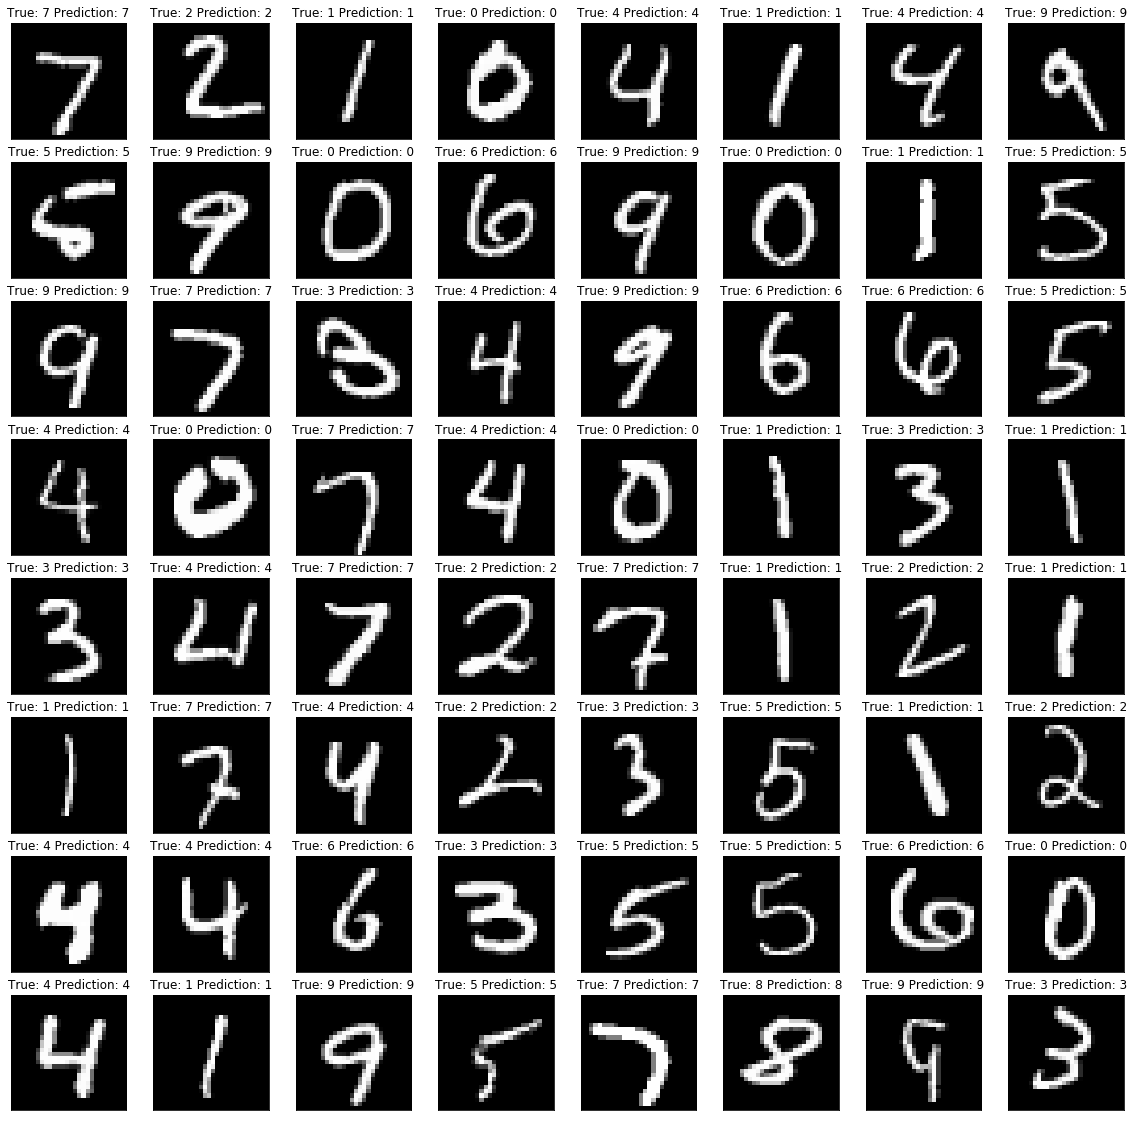

In [14]:
fig = plt.figure(figsize=(20, 20))
itr = iter(testloader)
images, labels = itr.next()
pred = model(images.to(device))
_, top_class = torch.topk(pred, 1, dim = 1)
for i, image in enumerate(images):
    img = fig.add_subplot(8, 8, i+1, xticks = [], yticks = [])
    img.imshow(torch.squeeze(image), cmap = 'gray')
    img.set_title("True: "+str(labels[i].item())+" Prediction: "+str(top_class[i].item()))